<a href="https://colab.research.google.com/github/blakelobato/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/Blake_Lobato_121A_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [4]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-09-19 01:02:58--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.177.101
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.177.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.5MB/s    in 13s     

2019-09-19 01:03:13 (14.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [5]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [6]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [7]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [8]:
##### YOUR CODE HERE #####
%cd/content/

/content


In [9]:
import urllib.request
url = 'https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz'
file_name = 'instacart_online_grocery_shopping_2017_05_01.tar.gz'

urllib.request.urlretrieve(url, file_name)

('instacart_online_grocery_shopping_2017_05_01.tar.gz',
 <http.client.HTTPMessage at 0x7fcace0c3828>)

In [0]:
import tarfile
tar = tarfile.open(file_name, "r:gz")
tar.extractall()
tar.close()

In [11]:
import os
print(os.getcwd())

/content


In [12]:
os.chdir('/content/instacart_2017_05_01/')
print(os.getcwd())

/content/instacart_2017_05_01


In [13]:
import glob
glob.glob("/content/instacart_2017_05_01/*.csv")

['/content/instacart_2017_05_01/products.csv',
 '/content/instacart_2017_05_01/order_products__train.csv',
 '/content/instacart_2017_05_01/departments.csv',
 '/content/instacart_2017_05_01/orders.csv',
 '/content/instacart_2017_05_01/aisles.csv',
 '/content/instacart_2017_05_01/order_products__prior.csv']

In [14]:
#aisles df
import pandas as pd
aisles = pd.read_csv('aisles.csv')
aisles.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [15]:
aisles.shape

(134, 2)

In [16]:
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [17]:
aisles.describe(exclude='number')

,aisle
count,134
unique,134
top,packaged produce
freq,1


In [18]:
# departments 
departments = pd.read_csv('departments.csv')
departments.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [19]:
departments.shape

(21, 2)

In [20]:
#order_products_prior
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [21]:
order_products__prior.shape
# We need order_id, product_id, add_to_cart_order


(32434489, 4)

In [22]:
#order_products__train
order_products__train = pd.read_csv('order_products__train.csv')
order_products__train.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [23]:
order_products__train.shape

(1384617, 4)

In [24]:
#orders
orders = pd.read_csv('orders.csv')
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [25]:
orders.shape

(3421083, 7)

In [0]:
#Need order_id, user_id, order_number, order_dow, order_hour_of_day

In [27]:
#products
products = pd.read_csv('products.csv')
products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [28]:
products.shape

(49688, 4)

In [29]:
#concatenate order_products__prior and order_products__train
order_products = pd.concat([order_products__prior, order_products__train])
order_products.shape
print(order_products__prior.shape, order_products__train.shape, order_products.shape)

(32434489, 4) (1384617, 4) (33819106, 4)


In [0]:
assert len(order_products__prior)+len(order_products__train) == len(order_products)

In [31]:
order_products.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [32]:
#Get a subset of orders - the first two orders for user id 1
#From orders need user_id, order_id, order_number, order_dow, order_hour_of_day
orders.head(5)



,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [33]:
#condition = (orders['user_id'] ==1) & (orders['order_number'] <=2) eddited out for assignment purposes
columns = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day']
#subset = orders[condition][columns]
subset = orders[columns]
subset.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day
0,2539329,1,1,2,8
1,2398795,1,2,3,7
2,473747,1,3,3,12
3,2254736,1,4,4,7
4,431534,1,5,4,15


In [34]:
subset.shape

(3421083, 5)

In [35]:
#merge Dataframes
columns = ['order_id', 'product_id', 'add_to_cart_order']
merged = pd.merge(subset, order_products[columns])
merged.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order
0,2539329,1,1,2,8,196,1
1,2539329,1,1,2,8,14084,2
2,2539329,1,1,2,8,12427,3
3,2539329,1,1,2,8,26088,4
4,2539329,1,1,2,8,26405,5


In [43]:
final = pd.merge(merged, products[['product_id', 'product_name']])
final.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,product_name
0,2539329,1,1,2,8,196,1,Soda
1,2398795,1,2,3,7,196,1,Soda
2,473747,1,3,3,12,196,1,Soda
3,2254736,1,4,4,7,196,1,Soda
4,431534,1,5,4,15,196,1,Soda


In [44]:
columns = ['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'add_to_cart_order', 'product_id', 'product_name']
final = final[columns]
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,473747,3,3,12,1,196,Soda
3,1,2254736,4,4,7,1,196,Soda
4,1,431534,5,4,15,1,196,Soda
5,1,3367565,6,2,7,1,196,Soda
6,1,550135,7,1,9,1,196,Soda
7,1,3108588,8,1,14,2,196,Soda
8,1,2295261,9,1,16,4,196,Soda
9,1,2550362,10,4,8,1,196,Soda


In [45]:
final = final.sort_values(by=['product_name', 'order_number'])
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
25762051,3799,2541199,1,0,11,6,25773,#2 Coffee Filters
25762052,4060,2098985,1,1,8,15,25773,#2 Coffee Filters
25762061,6404,516206,1,1,10,5,25773,#2 Coffee Filters
25762076,10463,2144789,1,1,9,2,25773,#2 Coffee Filters
25762099,16532,367347,1,3,13,10,25773,#2 Coffee Filters
25762118,21555,128731,1,0,19,13,25773,#2 Coffee Filters
25762197,43543,1770199,1,6,8,7,25773,#2 Coffee Filters
25762202,44613,1941096,1,3,13,6,25773,#2 Coffee Filters
25762213,49757,2777382,1,2,12,1,25773,#2 Coffee Filters
25762233,55145,2748074,1,1,18,5,25773,#2 Coffee Filters


In [46]:
columns = [col.replace('_',' ') for col in final.columns]
columns
final.columns = columns
final

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
25762051,3799,2541199,1,0,11,6,25773,#2 Coffee Filters
25762052,4060,2098985,1,1,8,15,25773,#2 Coffee Filters
25762061,6404,516206,1,1,10,5,25773,#2 Coffee Filters
25762076,10463,2144789,1,1,9,2,25773,#2 Coffee Filters
25762099,16532,367347,1,3,13,10,25773,#2 Coffee Filters
25762118,21555,128731,1,0,19,13,25773,#2 Coffee Filters
25762197,43543,1770199,1,6,8,7,25773,#2 Coffee Filters
25762202,44613,1941096,1,3,13,6,25773,#2 Coffee Filters
25762213,49757,2777382,1,2,12,1,25773,#2 Coffee Filters
25762233,55145,2748074,1,1,18,5,25773,#2 Coffee Filters


In [0]:
product_names = ['Banana','Bag of Organic Bananas', 'Organic Strawberries','Organic Baby Spinach','Organic Hass Avocado','Organic Avocado','Large Lemon','Strawberries', 'Limes', 'Organic Whole Milk']

In [53]:
products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [54]:
orders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [55]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [60]:
merged = (products[['product_id','product_name']].merge(order_products[['order_id', 'product_id']]).merge(orders[['order_id','order_hour_of_day', 'order_number']]))
merged.head(5)

,product_id,product_name,order_id,order_hour_of_day,order_number
0,1,Chocolate Sandwich Cookies,1107,11,2
1,769,Sliced American Cheese,1107,11,2
2,6184,Clementines,1107,11,2
3,8048,Packaged Grape Tomatoes,1107,11,2
4,9007,Frosted Flakes,1107,11,2


In [61]:
condition = merged['product_name'].isin(product_names)
subset = merged[condition]
subset.head(100)

,product_id,product_name,order_id,order_hour_of_day,order_number
7,13176,Bag of Organic Bananas,1107,11,2
8,16797,Strawberries,1107,11,2
20,16797,Strawberries,5319,14,65
47,16797,Strawberries,9273,15,1
51,21903,Organic Baby Spinach,9273,15,1
96,16797,Strawberries,13668,17,10
181,16797,Strawberries,25365,20,3
214,16797,Strawberries,33675,18,28
255,13176,Bag of Organic Bananas,43669,18,20
322,16797,Strawberries,54412,13,23


In [69]:
subset['product_name'].unique()

array(['Bag of Organic Bananas', 'Strawberries', 'Organic Baby Spinach',
       'Organic Whole Milk', 'Banana', 'Limes', 'Organic Strawberries',
       'Large Lemon', 'Organic Avocado', 'Organic Hass Avocado'],
      dtype=object)

In [0]:
#We needed columns -- product_id in df products/order_products
# we need product_name in df products
# we need order_id	in df order_products/orders
# we need order_hour_of_day	in df orders
# we need order_number in df orders

In [70]:
#Top 10 products and the amount of times they were ordered for all orders
subset['product_name'].value_counts().sort_index()

Bag of Organic Bananas    394930
Banana                    491291
Large Lemon               160792
Limes                     146660
Organic Avocado           184224
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Strawberries      275577
Organic Whole Milk        142813
Strawberries              149445
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
#short groupby example

In [39]:
order_products.groupby('order_id')['product_id'].count().mean()

10.10707325550502

In [0]:
grouped_orders = order_products.groupby('order_id')

In [42]:
grouped_orders.get_group(2539329)

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [44]:
order_products[order_products['order_id'] == 2539329]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [45]:
grouped_orders['product_id'].count()

order_id
1           8
2           9
3           8
4          13
5          26
6           3
7           2
8           1
9          15
10         15
11          5
12         15
13         13
14         11
15          5
16          3
18         28
19          3
20          8
21          5
22         14
23         14
24          3
25         14
26          8
27         27
28         16
29          5
30          3
31         10
           ..
3421053     9
3421055    19
3421056     5
3421057     5
3421058     8
3421059     6
3421060    17
3421061    22
3421062     7
3421063     4
3421064     3
3421065     5
3421066     6
3421067     1
3421068    14
3421069    12
3421070     3
3421071     5
3421072    12
3421073     2
3421074     4
3421075     8
3421076     8
3421077     4
3421078     9
3421079     1
3421080     9
3421081     7
3421082     7
3421083    10
Name: product_id, Length: 3346083, dtype: int64

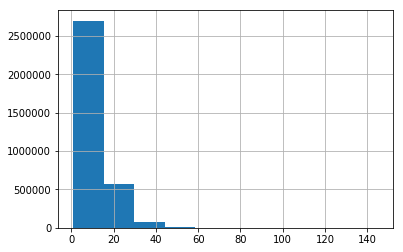

In [47]:
grouped_orders['product_id'].count().hist()

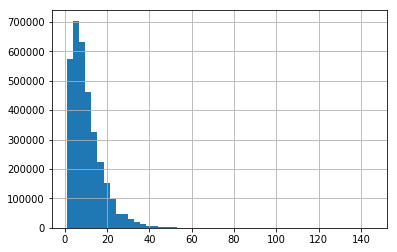

In [48]:
grouped_orders['product_id'].count().hist(bins=50)

In [0]:
#hadley wickham's example
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
table1 = pd.DataFrame([[np.nan,2],[16, 11], [3,1]], index=['John Smith', 'Jane Doe', 'Mary Johnson'], columns=['treatmenta','treatmentb'])
table2 =table1.T

In [158]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [159]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [160]:
#Table 1 --> Tidy
table1.index

Index(['John Smith', 'Jane Doe', 'Mary Johnson'], dtype='object')

In [0]:
table1 = table1.reset_index()

In [162]:
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [163]:
tidy = table1.melt(id_vars='index')
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [164]:
tidy.columns=['name','trt','result']
tidy

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [165]:
#Assignment Exercise Table 2 --> Tidy
table2.index

Index(['treatmenta', 'treatmentb'], dtype='object')

In [166]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [167]:
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [168]:
tidy = table2.melt(id_vars='index')
tidy

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [189]:
tidy.columns=['trt','name','result']
tidy

,trt,name,result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [117]:
#continuation of the code
#Tidy --> table1
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [118]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt,treatmenta,treatmentb
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [190]:
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [194]:
#Assignment Tidy --> Table 2
tidy.pivot_table(index='trt',columns='name',values='result')


name,Jane Doe,John Smith,Mary Johnson
trt,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


In [124]:
import seaborn as sns
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [126]:
##### YOUR CODE HERE #####
#Create a pivot table showing the number of passengers by month and year
flights_table = flights.pivot_table(index='year', columns='month')
flights_table

passengers                       ...                                    
month    January February March April  ... September October November December
year                                   ...                                    
1949         112      118   132   129  ...       136     119      104      118
1950         115      126   141   135  ...       158     133      114      140
1951         145      150   178   163  ...       184     162      146      166
1952         171      180   193   181  ...       209     191      172      194
1953         196      196   236   235  ...       237     211      180      201
1954         204      188   235   227  ...       259     229      203      229
1955         242      233   267   269  ...       312     274      237      278
1956         284      277   317   313  ...       355     306      271      306
1957         315      301   356   348  ...       404     347      305      336
1958         340      318   362   348  ...       404     359      310      337
1959         360      342   406   396  ...       463     407      362      405
1960         417      391   419   461  ...       508     461      390      432

[12 rows x 12 columns]

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [139]:
merged = (products[['product_id','product_name']].merge(order_products[['order_id', 'product_id']]).merge(orders[['order_id','order_hour_of_day', 'order_number']]))
merged.head(5)

,product_id,product_name,order_id,order_hour_of_day,order_number
0,1,Chocolate Sandwich Cookies,1107,11,2
1,769,Sliced American Cheese,1107,11,2
2,6184,Clementines,1107,11,2
3,8048,Packaged Grape Tomatoes,1107,11,2
4,9007,Frosted Flakes,1107,11,2


In [151]:
merged['order_hour_of_day'].unique()

array([11, 14, 10, 15, 16, 18, 17, 22, 23, 12, 19,  5,  7, 20, 21, 13,  9,
        4,  0,  1,  8,  6,  2,  3])

In [173]:
late_hour = merged[merged['order_hour_of_day'] == 23]
late_hour.head(100)


,product_id,product_name,order_id,order_hour_of_day,order_number
121,1,Chocolate Sandwich Cookies,18303,23,16
838,1,Chocolate Sandwich Cookies,192065,23,16
839,12341,Hass Avocados,192065,23,16
840,13176,Bag of Organic Bananas,192065,23,16
841,36051,Glass Cleaner,192065,23,16
842,46061,Popcorn,192065,23,16
2918,1,Chocolate Sandwich Cookies,551750,23,2
2919,2512,99% Fat Free Chicken Broth,551750,23,2
2920,9065,Mint Chocolate Cookie Ice Cream,551750,23,2
2921,13870,Lightly Salted Baked Snap Pea Crisps,551750,23,2


In [195]:
late_hour.groupby('product_name').count().idxmax()

product_id           1
product_name         1
order_id             1
order_hour_of_day    1
dtype: int64

In [223]:
pop_late_hour =late_hour.groupby(['product_name'], sort=False)['order_number'].max()
pop_late_hour.head()

product_name
Chocolate Sandwich Cookies    89
Hass Avocados                 86
Bag of Organic Bananas        99
Glass Cleaner                 26
Popcorn                       85
Name: order_number, dtype: int64

In [220]:
import heapq
popular_items = heapq.nlargest(25, pop_late_hour)

<function list.index>

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####